<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week3_LectureSlide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM5222
# Week 3

## Topics

* MLE fitting
* AIC and BIC
* Liklihood Ratio Test
* Cross-Validation
* Robust estimation







## MLE fitting

In the vidoes for this week, we discussedd MLE fitting either explicitly or via numerical methods.    Here we will touch on a couple of properties that make MLE's popular, and work another example using scipy.stats.



This is not an exhaustive list, but will highlight some of the the key features. Suppose that we are attempting to fit a PDF $f_X(x;\mathbf{\theta})$ where $\mathbf{\theta} = (\theta_1, \theta_2,..., \theta_m)$.

We have a set of IID data $x = (x_1,x_2, ..., x_N)$ which we will use to estimate the parameter vector $\mathbf{\theta}$ 

Let us use the notation 

$$\mathrm{MLE}(x) = \hat{\mathbf{\theta}} = (\hat{\theta}_1,\hat{\theta}_2 ,...,\hat{\theta }_m)$$ 

The MLE is a function $\mathbb{R}^N \to \mathbb{R^m}$ 

We are interested in the properties of the vector valued random variable $\mathrm{MLE}(\mathbf(X))$


More broadly, we let $t(X)$ be any estimator $t(X)$ is a vector valued random variable, not necessarily the MLE.


### Bias



An estimator's bias can defined as $\mathrm{Bias}(t) \triangleq \mathrm{E}(t(X) - \theta)$

Ideally, the bias is the zero vector in which case we say the estimator is *unbiased*.  

While this is ideal, in general, MLE's are not unbiased.

Having said that, being unbiased is perhaps overrated.  Consider for example PDF with a single parameter $\theta$.  Suppose also that some practitioners use the same distribution but identify the parameter as $\gamma = g(\theta)$ where $g$ is a non-linear, monotonic function (more specifically, not affine). 

If $t(X)$ is an unbiased estimator of $\theta$, it generally will **not** be true that $g(t(X))$ is an unbiased etimator for $\gamma$. That is because

$$\mathrm{E}(g(t(X) - \gamma) = \mathrm{E}(g(t(X)) -  g(\theta)$$ but
$$\mathrm{E}(g(t(X)) \neq g\left( \mathrm{E}(t(X))  \right) = g(\theta)$$ 


On the other hand, it *is* true that

$$MLE(g(t(X)) = g(MLE(t(X))$$ 

so that the MLE will yield the same estimate for $\theta$ and $\gamma$ no matter how you prefer to define your PDF.


### Asymptitically Unbiased

On the other hand, suppose that $N$ is the sampel size, then an estimator $t(X)$ is said to be asymptotically unbiased if
$$\lim_{N\to \infty} \Vert\mathrm{E}(t(X) - \theta\Vert\to 0$$


MLE's are asymptotically unbiased.



### Consistent

And estimator is consistent if we probability that $t(X)$ is close to $\theta$ gets aribitrarily close to 1 if $N$ is made large enough.  More formally, $t(X)$ is consistent if:

Given any $\epsilon >0, \delta >0$, no matter how small, there is an $M$ so large that for any $N >M$, we have
$$\mathrm{Pr}(\Vert t(X) - \theta \Vert < \epsilon ) > 1- \delta$$

Another way to say this is that $t(X)$ converges in probability to $\theta$ as $N \to \infty$.

MLE's are consistent.

### Low Variance

Without getting into techincal details, MLEs generally have lower variance than competing estimators.  We already saw this demonstrating the video when comparing MLE vs moment matching for the lognormal distribution.

### Example

Fit the skew normal distribution to daily log changes in Silver over the period 1/1/2005 - 1/1/2015. The skew-normal distribution is a case of the Azzalini-Capitanio approach discusssed previously for fitting skewed data. 


The PDF is given by 

$$f_X(x;a, \xi, \eta) = \frac{2}{\eta} \phi(y) \Phi(ay)$$
where $y = \frac{x-\xi}{\eta}$


We can use the scipy.stats module skewnorm.  The fit method performs MLE. 

In [ ]:
! pip install yfinance

     |████████████████████████████████| 6.4 MB 12.0 MB/s 
     |████████████████████████████████| 63 kB 582 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Get data

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as ss


Silver = yf.Ticker("SI=F").history(start = "2005-01-01", end = "2015-01-01")

Silver["logClose"] = np.log(Silver.Close)

Silver["R_log"] = Silver.logClose.diff()

Silver = Silver.dropna()

Silver

,Open,High,Low,Close,Volume,Dividends,Stock Splits,logClose,R_log
Date,,,,,,,,,
2005-01-04,6.450000,6.450000,6.427,6.427,1,0,0,1.860508,-0.007750
2005-01-05,6.512000,6.512000,6.512,6.512,51,0,0,1.873647,0.013139
2005-01-06,6.433000,6.433000,6.433,6.433,1,0,0,1.861441,-0.012206
2005-01-07,6.440000,6.440000,6.415,6.429,216,0,0,1.860819,-0.000622
2005-01-10,6.430000,6.431000,6.415,6.431,6,0,0,1.861130,0.000311
...,...,...,...,...,...,...,...,...,...
2014-12-24,15.680000,15.680000,15.673,15.673,1,0,0,2.751940,-0.003630
2014-12-26,15.940000,16.115000,15.940,16.112,4,0,0,2.779564,0.027625
2014-12-29,15.950000,15.950000,15.744,15.744,277,0,0,2.756459,-0.023105


Now let's quick make a histogram along make a KDE plot.

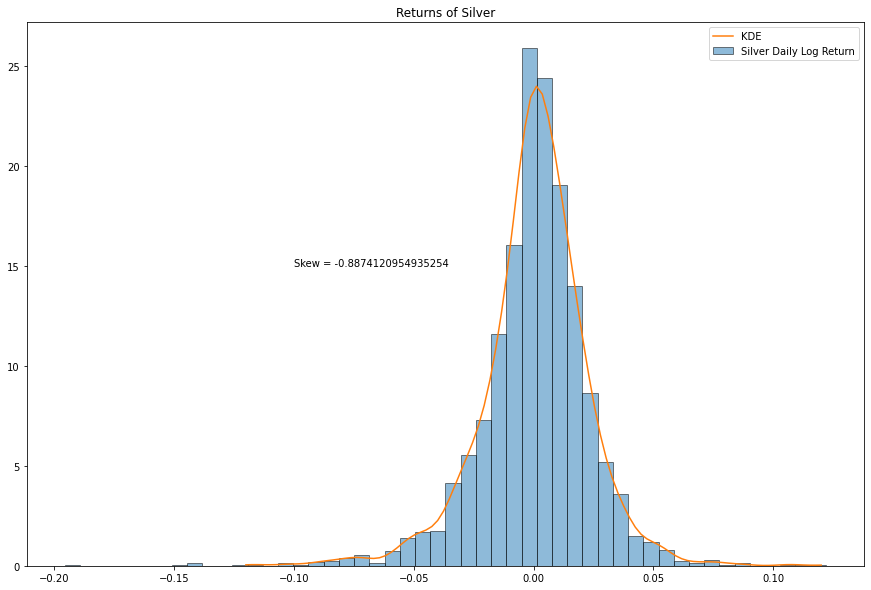

In [ ]:
xvals = np.linspace(-.12, .12,100)

plt.figure(figsize = (15,10))
plt.hist(Silver.R_log, bins = 50, density = True ,edgecolor = "black", alpha = .5 , label="Silver Daily Log Return")

plt.plot(xvals, ss.gaussian_kde(Silver.R_log)(xvals), label = "KDE")

plt.text(-.1,15 , "Skew = "+str(Silver.R_log.skew()))

plt.title("Returns of Silver")

plt.legend()

plt.show()

Now we fit using skewnorm

In [ ]:
parameters_fit = ss.skewnorm.fit(Silver.R_log)

parameters_fit

(-1.476522829604268, 0.019953100878584946, 0.030173954159760485)

Note that the first value is the parameter a, the next two are location and scale.  Let's add this to our plot.

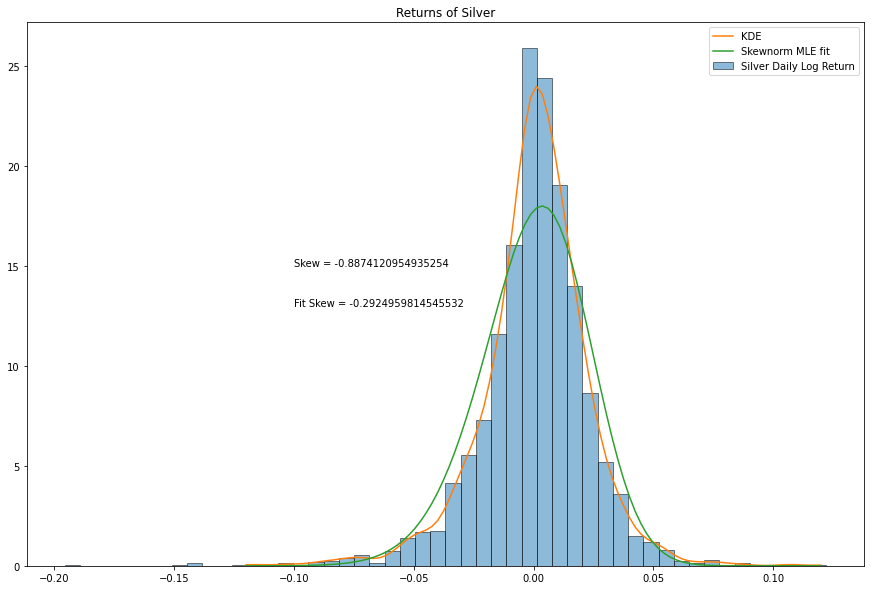

In [ ]:

plt.figure(figsize = (15,10))
plt.hist(Silver.R_log, bins = 50, density = True ,edgecolor = "black", alpha = .5 , label="Silver Daily Log Return")

plt.plot(xvals, ss.gaussian_kde(Silver.R_log)(xvals), label = "KDE")


plt.plot(xvals, ss.skewnorm.pdf(xvals, a = parameters_fit[0], loc = parameters_fit[1], scale = parameters_fit[2]),\
        label = "Skewnorm MLE fit" )

plt.text(-.1,15 , "Skew = "+str(Silver.R_log.skew()))


plt.text(-.1,13 , "Fit Skew = "+str(ss.skewnorm.stats(a = parameters_fit[0],loc = parameters_fit[1],\
                                scale = parameters_fit[2], moments='s' )))

plt.title("Returns of Silver")

plt.legend()

plt.show()

We see that we haven't fully matched the skew (not the goal in MLE), but have retained skew in the fitted distribution.   You might also note that perhaps kurtosis is not really accounted for well.  Indeed, here is quick comparison: 

In [ ]:
ss.skewnorm.stats(a = parameters_fit[0],loc = parameters_fit[1],scale = parameters_fit[2], moments='k' ),\
Silver.R_log.kurt()

(array(0.16982932), 6.232998200639827)

## AIC and BIC

In the example above, once we have through the effort of fitting to the skew norm distribution, we might well ask ourselves whether it is much of an improvement over just fitting to the normal distribution?  Or whether we wouldn't be better off fitting to a student t (or mixed normal or something else).    How can we judge beyond just making graphs?  


One of the most widely use approaches for this question is the Aikaike Information Criterion (AIC). 

The idea behind it (I am not going to derive it) that log-liklihood is a measure of "fit", but when we use more parameters in our model, our "fit" will always improve. So it adjusts the measure to penalize more paramters.

More precisiley,  we denote the log-liklihood evaluated at our MLE parameters as

$$\ell(\mathbf{X};\mathbf{\hat{\theta}}) = \ln\left(f_{\mathbf{X}}(\mathbf{X}; \mathbf{\hat{\theta}}) \right)$$


For a given PDF $f_X(x;\theta)$ with $p$ parameters (meaning that $\theta = (\theta_1, \theta_2,...,\theta_p)$ we define

$$AIC= -2\ell(\mathbf{X};\mathbf{\hat{\theta}}) + 2p$$ 

In this measure, the minus sign means that "smaller is better" and it is clear that each additional parameter is penalized explicitly.

Now suppose we had two competing models, say the skew-normal above and just just good old normal.  We would prefer the model with the lower AIC.

Let calculate these.

We start with the skewnormal fit since we have already done the work.





In [ ]:
AIC_sn = -2*ss.skewnorm.logpdf( Silver.R_log, a = parameters_fit[0],loc = parameters_fit[1],\
                    scale = parameters_fit[2]).sum() + 2*3
AIC_sn

-11942.869242037585

We then fit the normal and perform the same calculation.  

In [ ]:
nfit = ss.norm.fit(Silver.R_log)  # note, we could just calculate mean and standard deviation, but this was easy

In [ ]:
AIC_n = -2*ss.norm.logpdf(Silver.R_log, loc = nfit[0], scale=nfit[1]).sum() + 2*2

AIC_n

-11837.461714997316

"Smaller" means (in this case) more negative.  The AIC suggests selecting the skew normal.

We next compare to the student T.

In [ ]:
tfit =  ss.t.fit(Silver.R_log)
AIC_t = -2*ss.t.logpdf(Silver.R_log, df = tfit[0], loc = tfit[1], scale = tfit[2]).sum() + 2*3
AIC_t

-12297.029499401966

This suggests that the student T would have been a fit all along. 

### BIC

BIC stands for "Baysian Information Criterion".  It is conceptually similar to AIC but is "derived" somewhat differentlly. BIC increases the penalty for more parameters when there is more data.  It is given by


$$BIC= -2\ell(\mathbf{X};\mathbf{\hat{\theta}}) + \ln(N)p$$ 


Let's calculate this for our example.  We will need to know how many point we sampled.


In [ ]:
N = len(Silver.R_log)

BIC_sn = -2*ss.skewnorm.logpdf( Silver.R_log, a = parameters_fit[0],loc = parameters_fit[1],\
                    scale = parameters_fit[2]).sum() + np.log(N)*3


BIC_n = -2*ss.norm.logpdf(Silver.R_log, loc = nfit[0], scale=nfit[1]).sum() + np.log(N)*2
BIC_t = -2*ss.t.logpdf(Silver.R_log, df = tfit[0], loc = tfit[1], scale = tfit[2]).sum() +  np.log(N)*3


BIC_sn, BIC_n, BIC_t

(-11925.381544424954, -11825.80324992223, -12279.541801789335)

We see in this case, BIC and AIC lead to the same conclusions.  This is often the case.


#### Comment

The first term in AIC and BIC is the same, it is called the *deviance*:

$$\mathrm{deviance} = -2\ell(\mathbf{X};\mathbf{\hat{\theta}})$$

Hence we can think of 

$AIC = \mathrm{deviance} + 2p$

and

$BIC = \mathrm{deviance} + \ln(N)p$


This also means that for two models with the same number of parameters, AIC and BIC will always select the same model.

## Liklihood Ratio Test

Sometimes, models are "nested" in the sense the one model is just a special case of the other.  To be more precise, suppose we have a base model $f_X(x; \theta)$ where $\theta$ has $m$ parameters and the permitted parameters form an $m$-dimensional manifold (that is, you need all of the parmeters to specify the model).  Call the set of admissible paramaters $\Theta$

Now suppose that we have a more general model, $f^G_X(x;\theta^G)$ where

1. The set of admissible paramters $\Theta^G$ is an $m^G$ dimensional manifold with $m^G > m$
2. $ \Theta \subset\Theta^G   $
3. $f_X^G(x; \theta) = f_X(x;\theta)$ if $\theta \in \Theta$

We might sometimes call $f^G$ the parent model and $f$ the "child" model.    Some examples of this:

1. Generalised error distribution.  Retricted to the subset $\alpha = 2$, it is the normal distribution
2. Generalised error distribution.  Retricted to the subset $\alpha = 1$, it is the Laplace distribution
3. Skew-normal. Restricted to the subset $a = 0$, it is the normal distribution.
4. Gamma distribution.  Restriced to the subset $\alpha = 1$, it is the exponential distribution.



When we are selecting between a parent model and more resticted child model, we can evaluate the better model via a statisistical test called the Log Liklihood Test.

The null hypothesis $H_0$ of this test is that the child model is true (in the sense that the "true" parameters fall in parameter space of the child model).

The test statistic is the difference between the deviances (as defined above). 

$$llt =2\left(\ell^G(\mathbf{X};\mathbf{\hat{\theta}^G}) -\ell(\mathbf{X};\mathbf{\hat{\theta}}\right)  $$

If the sample size is large and the $H_0$ is true, the distribution of the test statistic is approximately the $\chi^2$ distribution with $m^G - m$ degrees freedom

This means we can judge with a $p$-value whether to reject our simpler model in favor of a more general one. 

Let apply this for the Silver example since skew-normal is a parent model to the normal model.

In this case, it's clear that the dimensionality difference is 1, so we are looking at 1 degree freedom in our $\chi^2$ comparison.

In [ ]:
dev_sn = -2*ss.skewnorm.logpdf( Silver.R_log, a = parameters_fit[0],loc = parameters_fit[1],\
                    scale = parameters_fit[2]).sum() 

dev_n = -2*ss.norm.logpdf(Silver.R_log, loc = nfit[0], scale=nfit[1]).sum()

llt= dev_n - dev_sn

print(llt)



107.40752704026818


Now, to be honest, I don't need to look this up, because I know this will be rejected.  But anyway:

In [ ]:
1 - ss.chi2.cdf(llt, df  =1)

0.0

Of course, rejection of $H_0$ does not mean the parent model is true!

## Out of Sample and Cross Validation

It's often the case however that models are not "nested".  And while we can still compare them with AIC or BIC, there is another model selection approach that essentially challenges the model to perform better "out of sampe".

The simplest way to think of this is to hold out (say) $30\%$ of the data and fit both models (assuming we have jus two) to the remaining $70\%$.   We then look too see which fitted model fits on the hold out set.  We don't get to use the data from the hold out to inform our parameter estimates, just the $70\%$ (called the *training data*). 

How will we measure "fit"?  This can depending on the situation and our objectives, but for now, let's deviance.


Let's do a quick example. 

We will generate fake data from the student t with 10 degrees freedom. We will then fit two models:  Student t and generalized normal. We then


In [ ]:
#1 Generate Fake Data
N = 200

np.random.seed(222)
data = ss.t.rvs(df = 10, size = N )




In [ ]:
#2 Split data (randomly)

#We first shuffle the data.  In this case, there is no point but often data come in with some kind of sort.

np.random.shuffle(data)

data_train = data[0:int(.7*N)]
data_test = data[int(.7*N):]



3. Fit both models.

In [ ]:
fit_gn = ss.gennorm.fit(data_train)
print(fit_gn)

fit_t = ss.t.fit(data_train)

print(fit_t)

(1.1841607112039712, -0.012091600641615527, 1.1707826250819848)
(5.354601125614771, 0.019405180841059147, 1.0299917183409089)


4. Calculate the deviance out of sample.

In [ ]:
dev_gn = -2*ss.gennorm.logpdf(data_test, beta = fit_gn[0], loc = fit_gn[1], scale = fit_gn[2]).sum()
print("The out of sample deviance for the genarlized norm distribution is ",dev_gn)

dev_t = -2*ss.t.logpdf(data_test, df = fit_t[0], loc = fit_t[1], scale = fit_t[2]).sum()
print("The out of sample deviance for the t distribution is ",dev_t)





The out of sample deviance for the genarlized norm distribution is  211.6907181055798
The out of sample deviance for the t distribution is  210.99225653163052


So we see that, perhaps not suprisingly, the t-distribution appears to be a (slightly) better fit.

But how do we know that we didn't just get lucky?  That is, maybe the it's the split that mattered.  What if we split differently?  Let's see:

In [ ]:
for k in range(10):

    np.random.shuffle(data)

    data_train = data[0:int(.7*N)]
    data_test = data[int(.7*N):]

    fit_gn = ss.gennorm.fit(data_train)
    fit_t = ss.t.fit(data_train)

    dev_gn = -2*ss.gennorm.logpdf(data_test, beta = fit_gn[0], loc = fit_gn[1], scale = fit_gn[2]).sum()


    dev_t = -2*ss.t.logpdf(data_test, df = fit_t[0], loc = fit_t[1], scale = fit_t[2]).sum()
    
    if dev_t < dev_gn:
        print("The student T fits better")
    else:
        print("The Generalized Normal fits better")
    





The Generalized Normal fits better
The Generalized Normal fits better
The Generalized Normal fits better
The Generalized Normal fits better
The Generalized Normal fits better
The Generalized Normal fits better
The student T fits better
The Generalized Normal fits better
The Generalized Normal fits better
The student T fits better


Hmm, how can we make this more reliable?

### Cross-Validation

A popular techinique is called $K$-fold cross validation where typically $K = 3,5$, or $10$.  The idea is to split the data into $K$ disjoint subsets.  We then loop on K, for each, we use the $K$th subset as the hold out, train with the other data, and calculate the score (e.g. deviance).  We then average the score across all of the folds.  The model that has the best "average" score is the "winner".  

We do this here rather manually.  But note that the package sklearn can simplify this process considerably.

In [ ]:
np.random.shuffle(data)

K = 10

scores_gn = np.zeros(K)

scores_t = np.zeros(K)

data = data.reshape([int(N/K), K])  # works here because K divides N. 

for k in range(K):
    
    test = data[:,k]
    train = np.delete(data, k, axis = 1).flatten()

    
    fit_gn = ss.gennorm.fit(train)
    fit_t = ss.t.fit(train)
    
    scores_gn[k] = -2*ss.gennorm.logpdf(test, beta = fit_gn[0], loc = fit_gn[1], scale = fit_gn[2]).sum()


    scores_t[k] = -2*ss.t.logpdf(test, df = fit_t[0], loc = fit_t[1], scale = fit_t[2]).sum()
    
 
print("The average deviance for the gen norm model is ", scores_gn.mean())

print("The average deviance for the t model is ", scores_t.mean())
    




The average deviance for the gen norm model is  67.57431216202075
The average deviance for the t model is  67.57210243847734


Here we might conclude that the models are pretty darn close.


## Robust estimation

One of the reasons problems with moment matching can be that outliers have exaggerated impact on the calculated sample moments.  This can create a distortion in the estimated parameters when either the model is a near fit, but not exactly from the assumed distribution, or when there is noise in the data than can create outliers.  Robust estimation attempts to address this by using quantile metrics that are not overly influenced by outliers.





### Robust  Esimation of the mean

We assume here that we believe the underlying is from the normal distribution. A robust estimate might be something like restricing the data to the $q$ and $1-q$ quantiles of the data and calculating the mean of that set. As noted in the text, as $q \to .5$, this is essentially just taking the median.   More typically, one wouldd take something  like $q=1$ or $q=.25$ (restricing to the IQR).  

You may recall seeing things like this in the olympics where the top and bottom judge scores are tossed before averaging.


### Robust Estimation of the Standard Deviation

Again, assuming we believe that the underlying data is normal, then the median absolute deviation (MAD) is median value of $X- X_{.5})$.

For the normal distribution, the the standard deviation will be approximately $1.4826 \times MAD$.  Hence, given a data set, we calculate the MAD of the data and multiply by $1.4826$ to estimate the standard deviation.


#### How did they get 1.4826?

We can calculate this numerically as follows:

Assume that $X$ follows the normal distribution with mean $\mu$ and variance $\sigma^2$.  

The median is $\mu$ and we seek to find the median $Y_{.5}$ of the random variable $Y = |X- \mu|$

That means we wish to solve  $F_Y(Y_{.5}) = 0.5$

$$0.5 = F_Y(Y_{.5})\\
=\mathrm{Pr}(Y \leq Y_{.5})\\
\mathrm{Pr}(|X- \mu| \leq Y_{.5})\\
= \mathrm{Pr}(X- \mu \leq Y_{.5} \land X- \mu \geq - Y_{.5})\\
= \mathrm{Pr}(X \leq \mu + Y_{.5} ) - \mathrm{Pr}(X \leq \mu - Y_{.5})\\
\int_{\mu - Y_{.5}}^{\mu + Y_{.5}} \frac{1}{\sigma}\phi\left( \frac{x-\mu}{\sigma} \right) dx$$

Substituting $u = \frac{x - \mu}{\sigma}$ we have $du = \frac{1}{\sigma} dx$ and therefore we want

$$0.5 = \int_{- \frac{Y_{.5}}{\sigma}}^{ \frac{Y_{.5}}{\sigma}} \phi(u) du\\
= \Phi\left( \frac{Y_{.5}}{\sigma}\right) - \Phi\left(- \frac{Y_{.5}}{\sigma}\right)\\
2\Phi\left( \frac{Y_{.5}}{\sigma}\right) -1$$

Hence,

$$ \frac{Y_{.5}}{\sigma}= \Phi^{-1}(.75)$$

or

$$\sigma =  \frac{Y_{.5}}{\Phi^{-1}(.75)}$$

which we compute

In [ ]:
1/ss.norm.ppf(.75)

1.482602218505602

#### Example

As an example, we will generate a data set from the standard normal distribution.  However, we will also throw in a small amount of "measurement errors" that will create outliers.

We will then compare fits to the normal distribuion with the standard approach (MLE and MM which will be the same) with the corresponding robust approach.  The robust approaches are not set in stone, and different practitioners may make different choices.

In [ ]:
N= 100

data = np.random.normal(size = 100)
data[97:] = np.array([5,7, 10])  # adding the noise

print("data mean is " ,data.mean())

print("data standard deviation is " ,data.std())


data mean is  0.22476492113501437
data standard deviation is  1.6847970893105881


Now the robust estimates

In [ ]:

data = np.sort(data)

robust_mean_est = data[25:75].mean()
print("robust estimate of mean is ",robust_mean_est )

MAD = np.median(abs(data - np.median(data)))
                
print("robust estimate of std is ",1.4826*MAD )
                              


robust estimate of mean is  0.13283747761961082
robust estimate of std is  1.15132480966412


### In class Exercise

Develop a way to use quantiles estimate the degree freedom in a student T distribution. Do this by

1. Defining your quantile measure of "fat tails" (last week's ex)
2. Calculating this as function of the degree freedom. It should be monotonic.
3. Your estimate can then be the inveres of this function.

You will do this numerically and I encourage you to make plots.

Finally, try it out for some data sets that you generate.  

* Does it work when there isn't noise?
* Add noise. Is it robust?  For this, compare the impact of the noise versus the impact of estimating via sample kurtosis.



